# Analysis and Prediction of Crimes in Chicago city

##### CS 418 Data Explorers Private github repository:  
https://github.com/CS418/group-project-data-explorers/blob/main/crime_prediction_chicago.ipynb

### Introduction

- The data we are analysing is from the Chicago Data Portal (https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2/data) which provides us information about all the crimes that took place in the city of Chicago from 2001 to Present

- The questions we would be investigating and predicting are:
    1. The type of crime that can happen
    2. If the crime ends up in an arrest or not


### Any changes?

We initially planned to work with the entire dataset which has data from 2001 - Present. That is 7662271 rows (as of Nov 2 2022)
Currently, we would be working on a subset of the dataset i.e., from 2019 - 2021 which has 680425 rows (as of Nov 2 2022)

This is being done to fit the time frame of our project. In the subsequent days, we would incorporate the entire dataset to finetune our model better

### Data initialisation

In [349]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [350]:
# from IPython.core.display import display, HTML

# def folium_deepnote_show(m):
#     data = m.get_root().render()
#     data_fixed_height = data.replace('width: 100%;height: 100%', 'width: 100%').replace('height: 100.0%;', 'height: 609px;', 1)
#     display(HTML(data_fixed_height))

In [377]:
crimes_df = pd.read_csv('Crimes-2019_to_2021.csv')
crimes_df.head(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11552667,JC100123,1/1/19 0:00,004XX N STATE ST,890,THEFT,FROM BUILDING,RESTAURANT,False,False,...,42.0,8.0,6,1176302.0,1903096.0,2019,1/10/19 15:16,41.889453,-87.627995,"(41.889453169, -87.627994833)"
1,11552674,JC100085,1/1/19 0:00,092XX S NORMAL AVE,910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,21.0,73.0,7,1174586.0,1843723.0,2019,1/10/19 15:16,41.726566,-87.636066,"(41.726566477, -87.636065622)"
2,11552709,JC100020,1/1/19 0:00,044XX S WASHTENAW AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,15.0,58.0,08B,1159112.0,1875020.0,2019,1/10/19 15:16,41.812780,-87.691894,"(41.812780011, -87.691893746)"
3,11552758,JC100058,1/1/19 0:00,063XX S MARSHFIELD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,...,16.0,67.0,14,1166414.0,1862607.0,2019,1/10/19 15:16,41.778565,-87.665464,"(41.77856457, -87.665463557)"
4,11553168,JC100745,1/1/19 0:00,008XX N MICHIGAN AVE,890,THEFT,FROM BUILDING,RESTAURANT,False,False,...,2.0,8.0,6,1177330.0,1906499.0,2019,1/10/19 15:16,41.898768,-87.624116,"(41.898767916, -87.624116333)"


In [378]:
crimes_df.shape

(680425, 22)

In [353]:
crimes_df.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

##### Meanings of columns

1. ID
2. Case Number: unique crime ID
3. Date: listed date of crime
4. Block: block where crime occured
5. IUCR: four digit Illinois Uniform Crime Reporting (IUCR) codes
6. Description: Short description of the type of crime
7. Location description: Description of where crime occured
8. Arrest: boolean value (T/F) of whether or not an arrest was made
9. Domestic: boolean value (T/V) of whether or not crime was domestic
10. Community Area: numeric value indicating area in community where crime occured
11. FBI Code: numeric code indicating FBI crime categorization
12. X & Y Coordinate: exact location where crime occured
13. Year: Year crime occured
14. Updated On: Date and time the crime was added
15. Latitude & Longitude: latitude and longitude information of crime

In [354]:
crimes_df.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,6.804250e+05,680425.000000,680425.000000,680390.000000,680424.000000,6.700100e+05,6.700100e+05,680425.000000,670010.000000,670010.000000
mean,1.203044e+07,1144.239909,11.213443,23.158710,37.023681,1.165010e+06,1.885805e+06,2019.920945,41.842237,-87.669997
std,7.293762e+05,696.647654,6.960818,13.860697,21.524839,1.643301e+04,3.179020e+04,0.826003,0.087434,0.059767
min,2.436800e+04,111.000000,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,2019.000000,36.619446,-91.686566
25%,1.180749e+07,611.000000,6.000000,10.000000,23.000000,1.153214e+06,1.858326e+06,2019.000000,41.766592,-87.712759
50%,1.206204e+07,1024.000000,10.000000,24.000000,32.000000,1.166831e+06,1.892082e+06,2020.000000,41.859643,-87.663555
75%,1.232259e+07,1713.000000,17.000000,34.000000,54.000000,1.176661e+06,1.908536e+06,2021.000000,41.904674,-87.627420
max,1.287802e+07,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951527e+06,2021.000000,42.022586,-87.524529


### Data cleaning

Converting the column names to a standard form and handling inconsistencies

In [355]:
crimes_df.columns = crimes_df.columns.str.strip()
crimes_df.columns = crimes_df.columns.str.replace(' ', '_')
crimes_df.columns = crimes_df.columns.str.lower()

- We have attributes: Latitude, Longitude and Location where Location is the combination of Latitude & Longitude data (Latitude,Longitude). So Location column is redundant and can be dropped

In [356]:
crimes_df.drop(['case_number','location'], axis = 1, inplace = True)

Checking if there are any null values

In [357]:
crimes_df.isna().sum()

id                          0
date                        0
block                       0
iucr                        0
primary_type                0
description                 0
location_description     3370
arrest                      0
domestic                    0
beat                        0
district                    0
ward                       35
community_area              1
fbi_code                    0
x_coordinate            10415
y_coordinate            10415
year                        0
updated_on                  0
latitude                10415
longitude               10415
dtype: int64

- Since latitude, longitude, ward are crucial information to detect the location of crime, missing information for these do not contribute much to the dataset. So, we can drop these rows with missing values
- Location description is not a mandatory column and would not affect our model. So, we don't have to delete it. We can replace missing values with 'Unavailable'

In [358]:
crimes_df.dropna(subset = ['latitude','longitude','ward'], inplace = True)
crimes_df.reset_index(drop = True, inplace = True)
crimes_df['location_description'] = crimes_df['location_description'].fillna('Unavailable')

In [359]:
crimes_df.isna().sum()

id                      0
date                    0
block                   0
iucr                    0
primary_type            0
description             0
location_description    0
arrest                  0
domestic                0
beat                    0
district                0
ward                    0
community_area          0
fbi_code                0
x_coordinate            0
y_coordinate            0
year                    0
updated_on              0
latitude                0
longitude               0
dtype: int64

In [360]:
crimes_df.shape

(669975, 20)

We removed 3 columns and (207351 - 202375 = 4976) 4976 rows. This constitutes to 2.3% of the initial dataset. Since, the value is very low we wouldn't have missed out on important insights

### Exploratory Data Analysis and Visualization

In [361]:
import matplotlib.pyplot as plt
import seaborn as sns

### Correlation Table

In [362]:
# Correlation Table to show relation among columns

crimes_df.corr()

,id,arrest,domestic,beat,district,ward,community_area,x_coordinate,y_coordinate,year,latitude,longitude
id,1.000000,-0.070632,0.036217,0.016028,0.016032,0.009096,-0.008644,-0.000410,0.013916,0.363361,0.013885,-0.000214
arrest,-0.070632,1.000000,-0.035655,-0.029982,-0.030081,-0.015942,0.020067,-0.030183,-0.026545,-0.103488,-0.026367,-0.030849
domestic,0.036217,-0.035655,1.000000,-0.064945,-0.064987,-0.083116,0.103331,0.018178,-0.119389,0.055577,-0.119200,0.016471
beat,0.016028,-0.029982,-0.064945,1.000000,0.999768,0.644717,-0.485691,-0.545096,0.632063,0.007650,0.632803,-0.540429
district,0.016032,-0.030081,-0.064987,0.999768,1.000000,0.645827,-0.486093,-0.546212,0.633214,0.007659,0.633956,-0.541537
ward,0.009096,-0.015942,-0.083116,0.644717,0.645827,1.000000,-0.514102,-0.472331,0.659889,-0.007436,0.660274,-0.466554
community_area,-0.008644,0.020067,0.103331,-0.485691,-0.486093,-0.514102,1.000000,0.250804,-0.765967,0.011302,-0.765234,0.241458
x_coordinate,-0.000410,-0.030183,0.018178,-0.545096,-0.546212,-0.472331,0.250804,1.000000,-0.533329,-0.000492,-0.535863,0.999898
y_coordinate,0.013916,-0.026545,-0.119389,0.632063,0.633214,0.659889,-0.765967,-0.533329,1.000000,-0.007829,0.999995,-0.523842
year,0.363361,-0.103488,0.055577,0.007650,0.007659,-0.007436,0.011302,-0.000492,-0.007829,1.000000,-0.007811,-0.000661


### Visualize number of crimes according to their type

#### Pie chart - Crime type
Crime Type: It includes all the Crime Types but as seen it is a poor visualization due to large no of CrimeTypes which have a proportion < 1% 

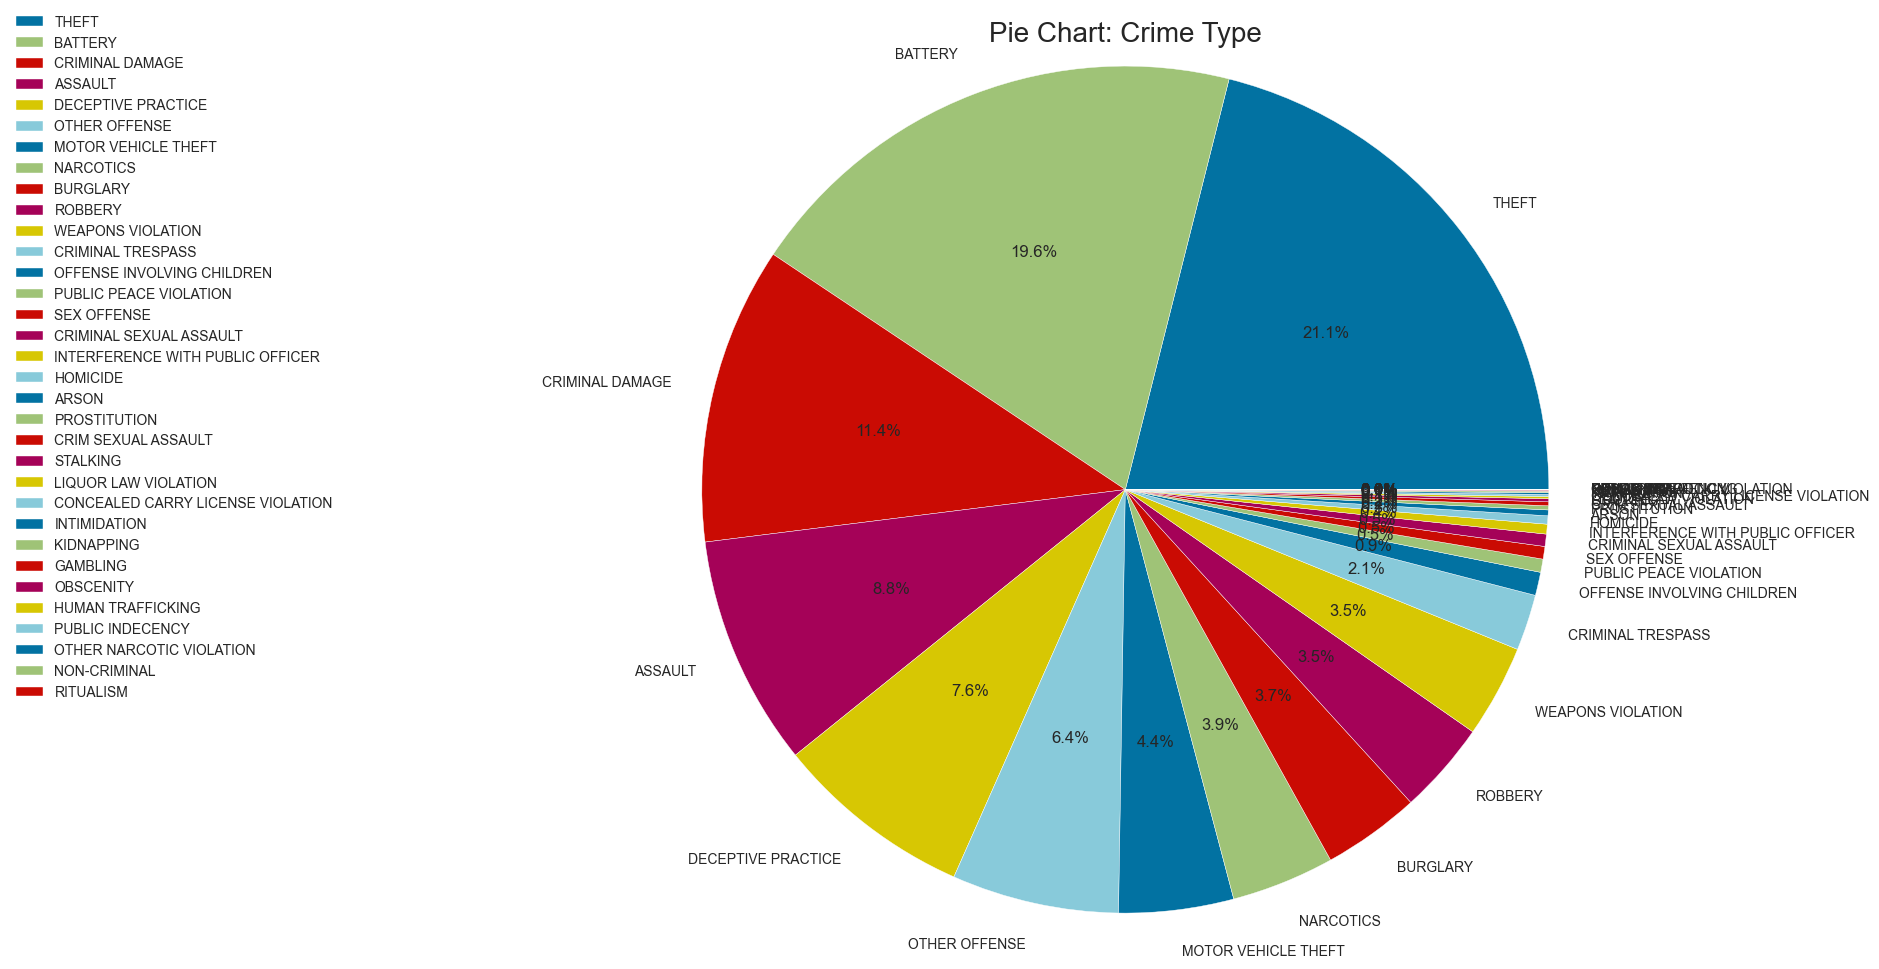

In [363]:
plt.title('Pie Chart: Crime Type',fontsize=20,pad=170)
crimes_data_primary_type_pie = plt.pie(crimes_df['primary_type'].value_counts().values,labels=crimes_df['primary_type'].value_counts().index,autopct='%1.1f%%',radius=2.5)
plt.legend(bbox_to_anchor=(-2.15, 1.65), loc="upper left")

Since there are many Crime Types with insignificant proportion in Total Data, we choose to vizualize applying threshold of Crime Types >= 1.0% which are 12 in number

#### Bar chart - Crime Type

Text(0, 0.5, 'Crime Type')

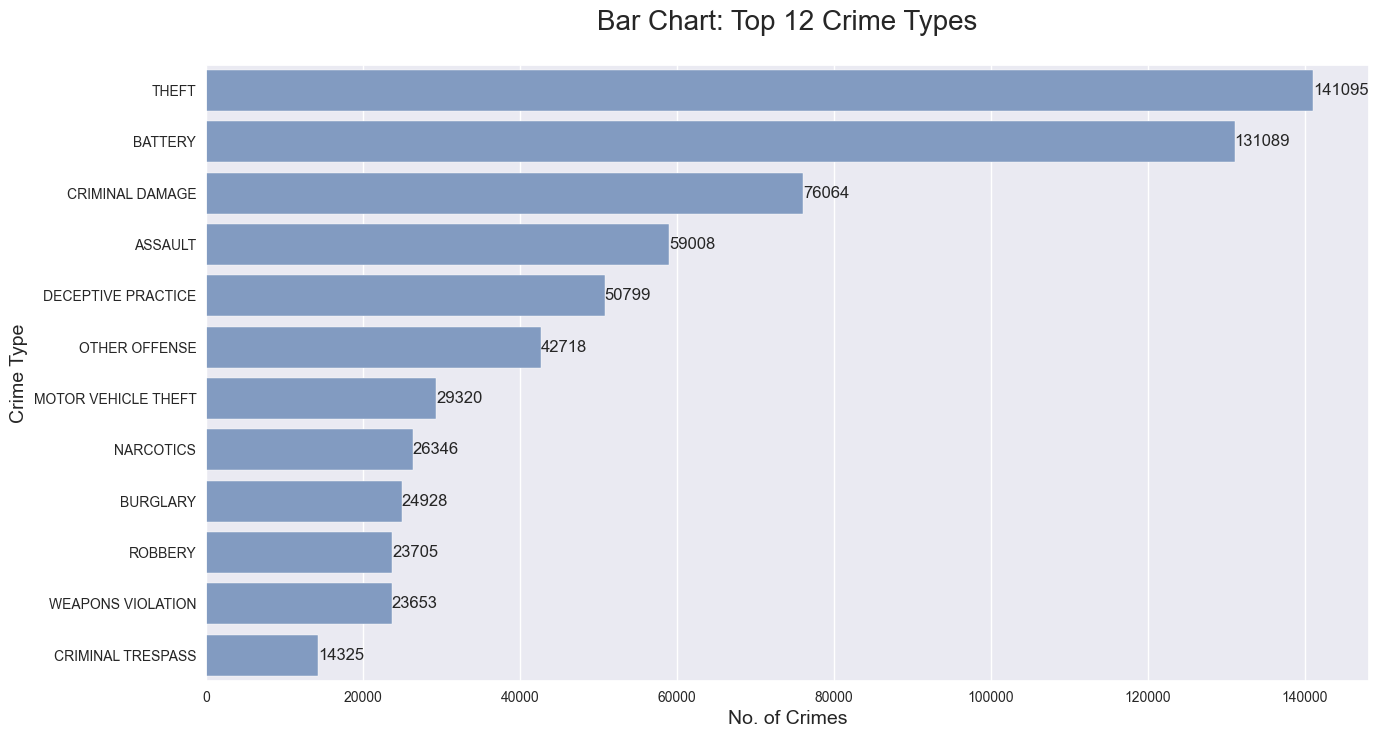

In [364]:
plt.figure(figsize=(15,8))
primary_type_barplot = sns.barplot(data=crimes_df,
                                     x=crimes_df['primary_type'].value_counts()[0:12].values,
                                     y=crimes_df['primary_type'].value_counts()[0:12].index,
                                     color = "#79C")
for i in primary_type_barplot.containers:
    primary_type_barplot.bar_label(i,)

plt.title('Bar Chart: Top 12 Crime Types', fontsize=20, pad = 25)
plt.xlabel('No. of Crimes', fontsize=14)
plt.ylabel('Crime Type', fontsize=14)

#### Pie chart - Crime Type
Percentages here are a bit off from the original dataset as we retain only Crime Types with proportion >= 1% 

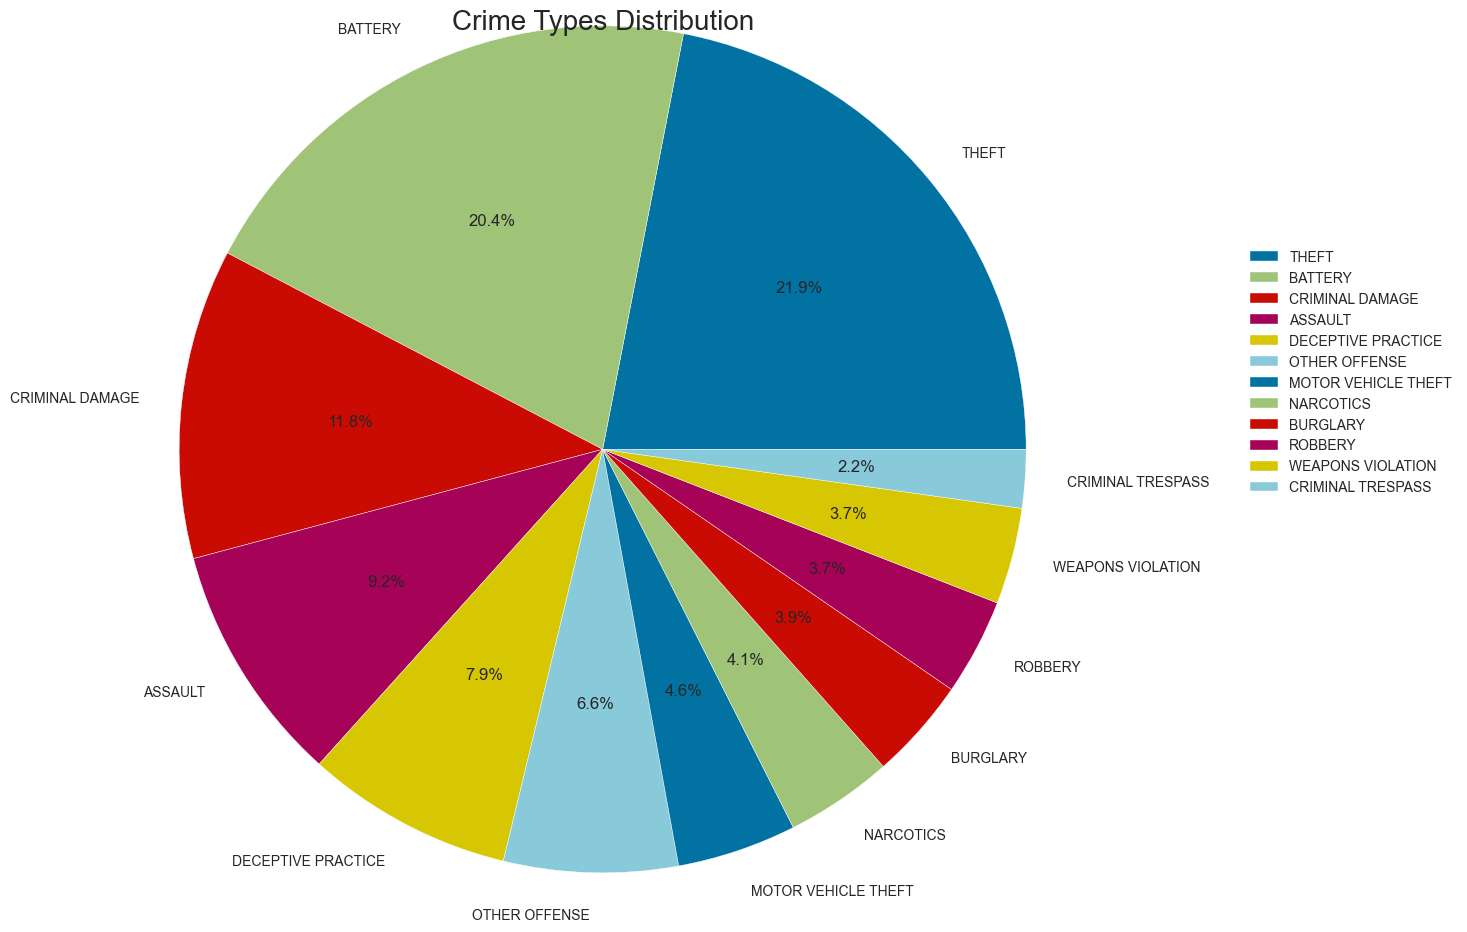

In [365]:
plt.title('Crime Types Distribution', fontsize = 20, pad = 150)
crimes_data_primary_type_pie = plt.pie(crimes_df['primary_type'].value_counts()[0:12].values,labels=crimes_df['primary_type'].value_counts()[0:12].index,autopct='%1.1f%%',radius=2.5)
plt.legend(bbox_to_anchor=(2, 1), loc="upper left")

Observation: We see that "theft" is the highest type of crime occuring among all other types.

### Visualize number of crimes by location of crime

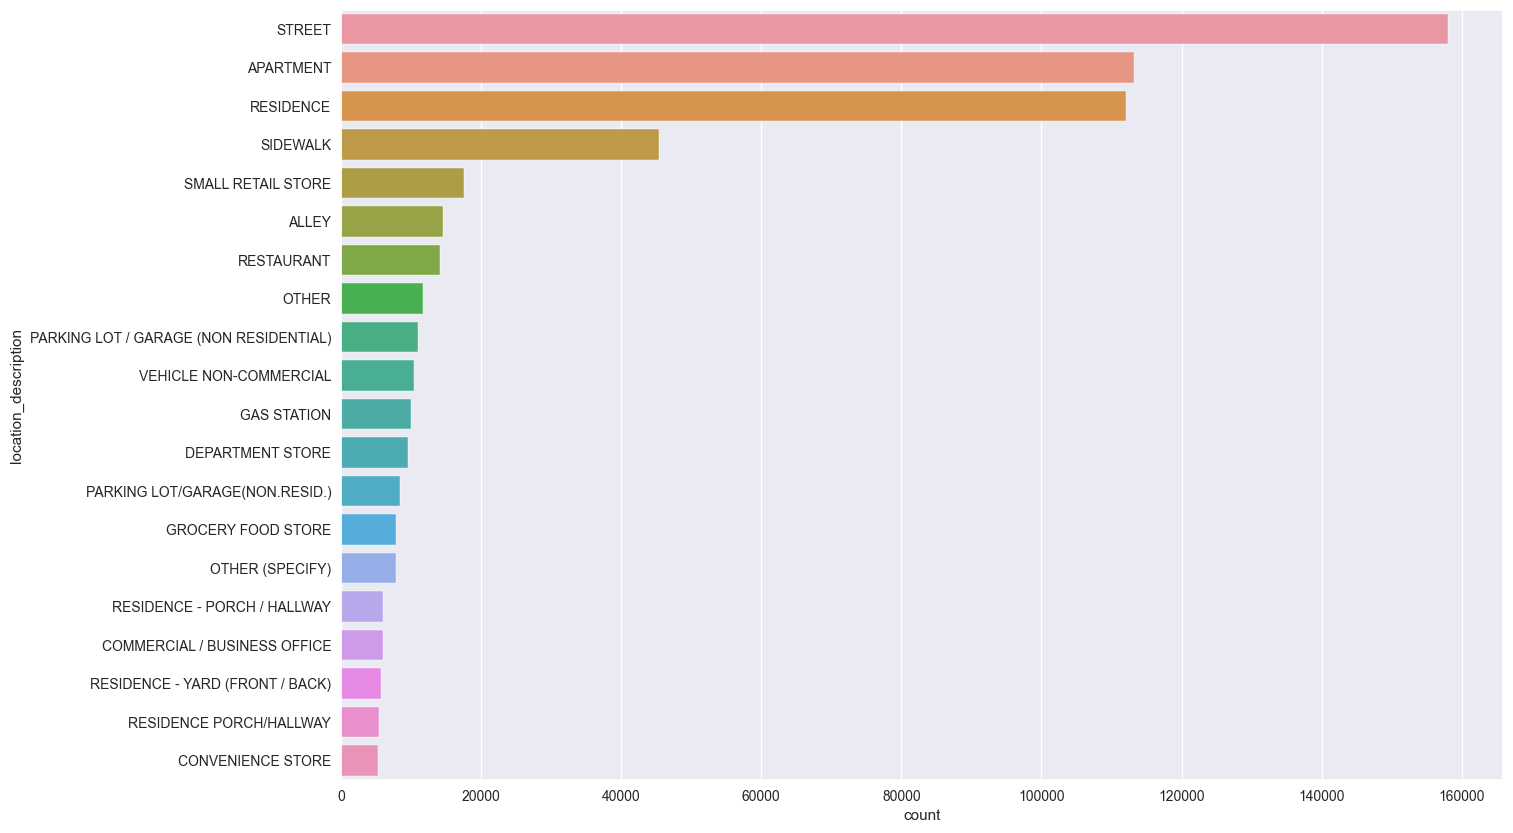

In [366]:
# We take the top 20 records

plt.figure(figsize = (15, 10))
sns.countplot(y = 'location_description', 
              data = crimes_df, 
              order = crimes_df['location_description'].value_counts().iloc[:20].index)

plt.show()

##### Observation: Most of the crimes occur in Streets

### Visualization of all crimes across districts

#### Bar graph

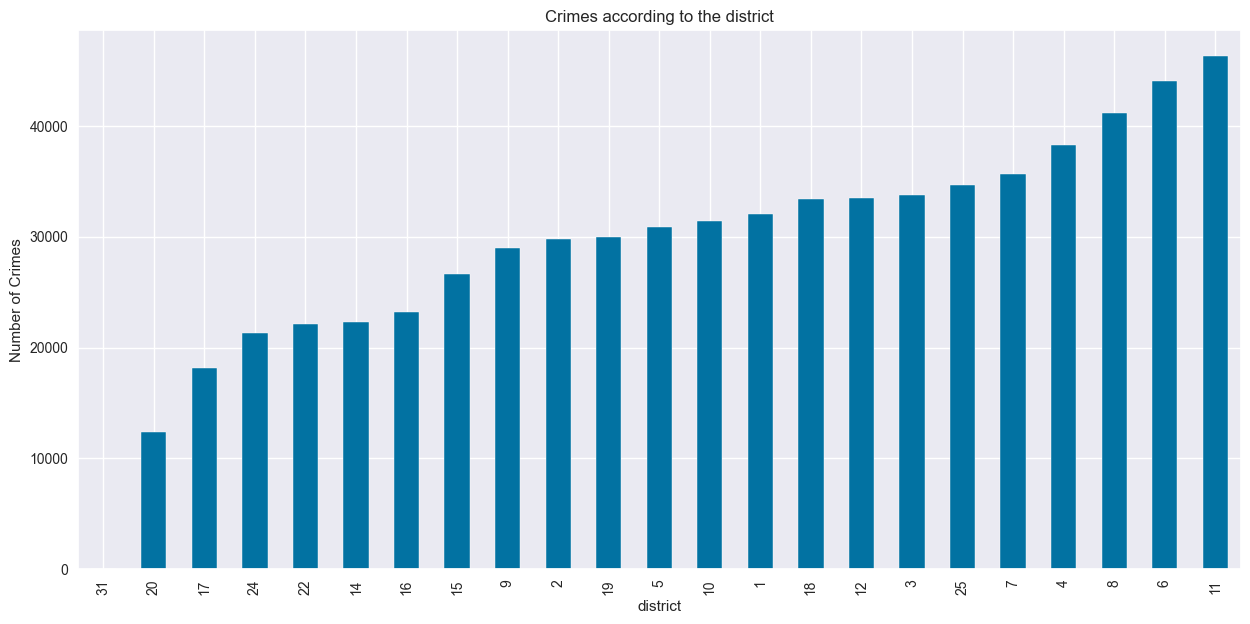

In [367]:
# Visualization of crimes accross districts

plt.figure(figsize=(15,7))
plt.title('Crimes according to the district')
plt.ylabel('Number of Crimes')
plt.xlabel('Crime Type')

crimes_df.groupby([crimes_df['district']]).size().sort_values(ascending=True).plot(kind='bar')

plt.show()

Observation: Here we see most crimes are occurring in district 11 and least in 31 indicating district 31 to be a safe locality whereas district 11 to be very unsafe

#### Map = Distribution of crimes across districts

In [368]:
# import folium

In [369]:
# crimes_df[['district', 'ward','community_area']] = crimes_df[['district', 'ward','community_area']].astype('int')
# crimes_df[['district', 'ward','community_area']] = crimes_df[['district', 'ward','community_area']].astype('str')

# crimes_df.columns= crimes_df.columns.str.strip().str.lower().str.replace(' ','_')

# style_function = lambda x: {'fillColor': '#ffffff', 
#                             'color':'#000000', 
#                             'fillOpacity': 0.1, 
#                             'weight': 0.1}
# highlight_function = lambda x: {'fillColor': '#000000', 
#                                 'color':'#000000', 
#                                 'fillOpacity': 0.50, 
#                                 'weight': 0.1}

In [370]:
# district_geo = r'https://data.cityofchicago.org/api/geospatial/fthy-xz3r?method=export&format=GeoJSON'

# # calculating total number of incidents per district
# DisData = pd.DataFrame(crimes_df['district'].value_counts(ascending=True).astype(float))
# DisData = DisData.reset_index()

# DisData.columns = ['district', 'crime_count']

In [371]:
# districtMap = folium.Map(location=[41.815117282, -87.669999562], zoom_start=11)
# districtMap.choropleth(geo_data = district_geo, 
#                 data = DisData,
#                 columns = ['district', 'crime_count'],
#                 key_on = 'feature.properties.dist_num',
#                 fill_color = 'Reds', 
#                 fill_opacity = 0.7, 
#                 line_opacity = 0.2,
#                 highlight=True,
#                 legend_name = 'Number of incidents per police district',
#                )

# feature = folium.features.GeoJson(
#         district_geo,
#         style_function=style_function,
#         control=False,
#         highlight_function=highlight_function,
#         tooltip=folium.features.GeoJsonTooltip(
#             fields=[
#                 'dist_num',
#             ],
#             aliases=[
#                 "District Number: ",
#             ],
#             style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;")
#             )
#         )
   
# districtMap.add_child(feature)
# districtMap.keep_in_front(feature)

In [348]:
# districtMap

Here, we use a map to depict the distribution of crimes based on their count in a map format. The district with a darker shade has more number of crimes and the ones with lighter shade has lesser number of crimes.  
We can see the district number on the map by hovering over it

### Visualization of every crime type across districts and years

#### Heat map = Crime Type vs District: 
Provides a holistic view of crimes across all Districts. This visualization is easy to comprehend as the color intensity represents higher count

<AxesSubplot: xlabel='district', ylabel='primary_type'>

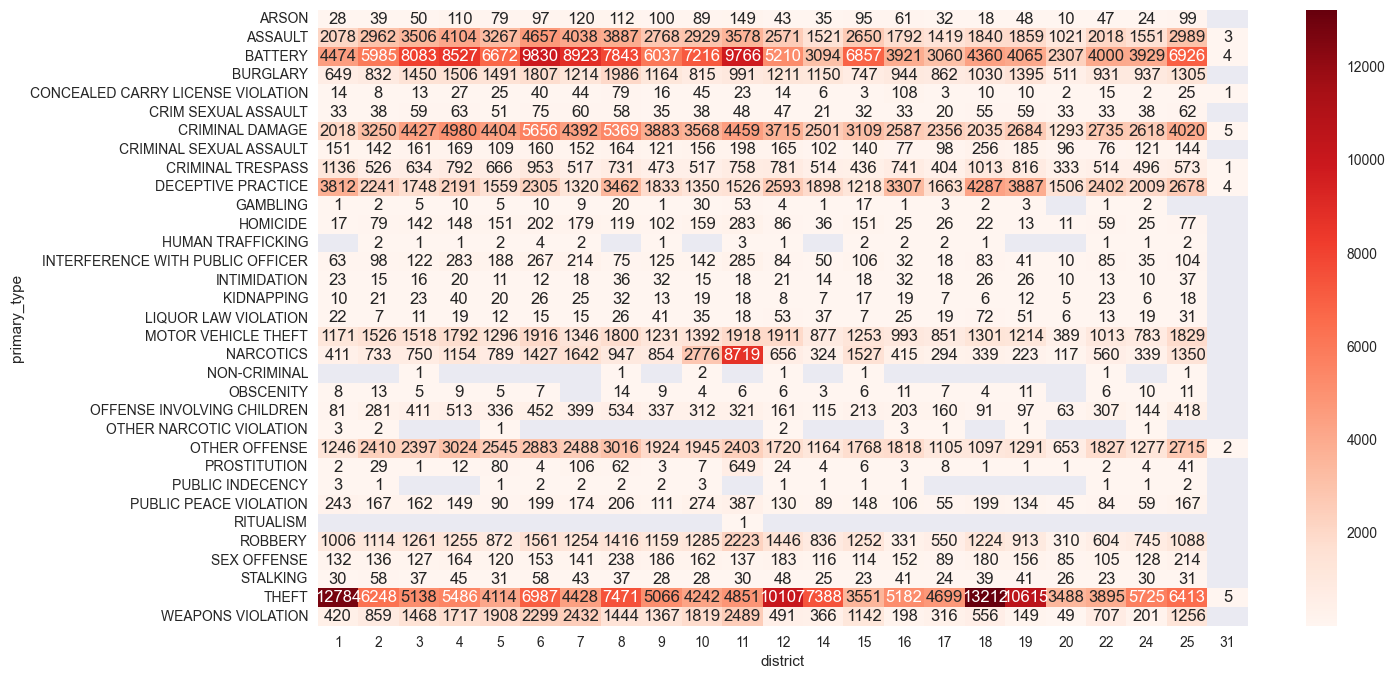

In [372]:
data_hm_district = crimes_df
data_hm_district = data_hm_district.groupby(['primary_type','district'])['year'].count().unstack()
plt.figure(figsize=(15,8))
sns.heatmap(data_hm_district,cmap='Reds',annot = True, fmt='g')

Heatmap is a graphical way to represent data in the form of hot and cold spots employing a warm-to-cool color scheme. The warm colors indicate sections with the most values, red being the area of highest value, and the cool colors point to the sections with the lowest values  

- District 31 is of the lightest shade thus indicating the least number of crimes in this district
- District 1 and district 18 have very high values of theft and is indicated with the darkest shade
- District 11 has a high crime rate for theft, narcotics, criminal damage and battery. The cumulative values of all these crimes denote this district to have the highest crime rate

#### Heat map = Crime Type vs Year: 
Provides a holistic view of crimes across all years
- This visualization is easy to comprehend as the color intensity represents higher count
- It helps to identify higher values, which have higher red hue
- Crime Types: Theft, Battery have decreased over period with highest drop in Theft from 61K to 39K

Text(158.2222222222222, 0.5, 'Crime Type')

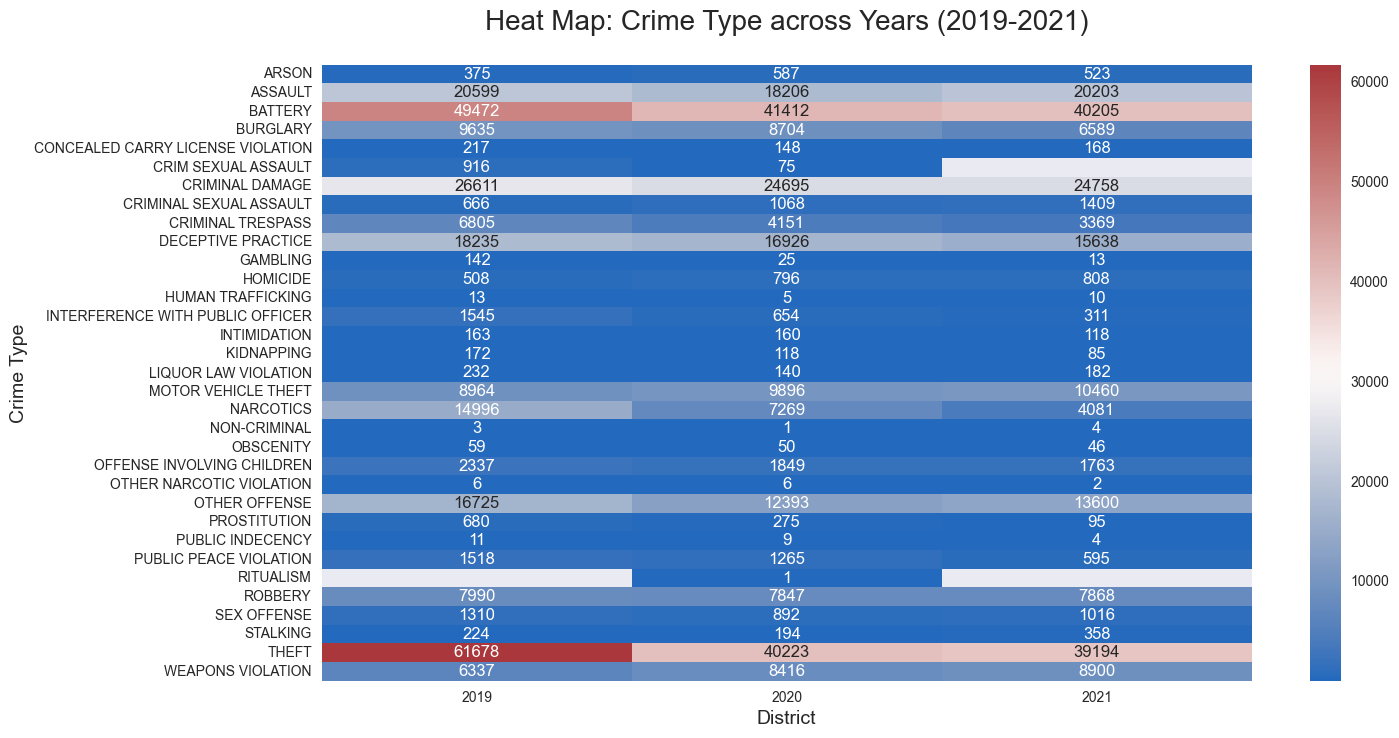

In [321]:
data_hm_annual = crimes_df
data_hm_annual = data_hm_annual.groupby(['primary_type','year'])['year'].count().unstack()
plt.figure(figsize=(15,8))
sns.heatmap(data_hm_annual,cmap='vlag',annot = True, fmt='g')

plt.title('Heat Map: Crime Type across Years (2019-2021)', fontsize=20, pad = 25)
plt.xlabel('District', fontsize=14)
plt.ylabel('Crime Type', fontsize=14)

### Grouping the seasons based on month

<AxesSubplot: xlabel='season', ylabel='count'>

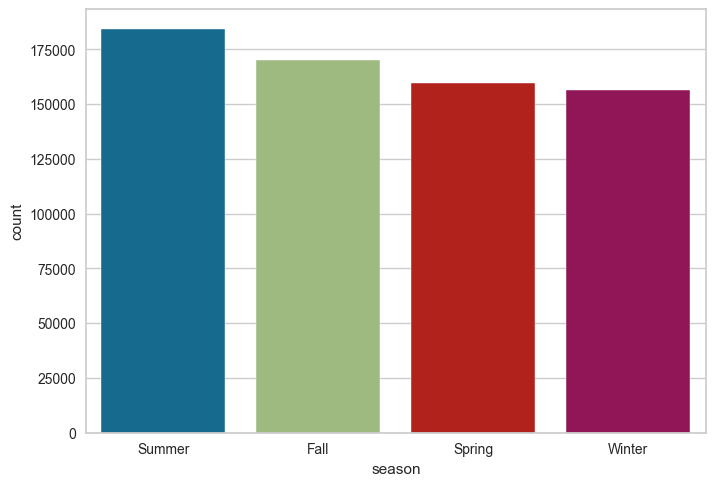

In [214]:
# Grouping the seasons based on month
crimes_df.date = pd.to_datetime(crimes_df.date)
crimes_df['month'] = crimes_df.date.dt.month_name()

group_season = {
    ('June','July','August') : 'Summer',
    ('September','October','November') : 'Fall',
    ('March','April','May') : 'Spring',
    ('December','January','February') : 'Winter'
}

season_dict = {}
for keys, values in group_season.items():
    for key in keys:
        season_dict[key] = values
        
crimes_df['season'] = crimes_df.month.map(season_dict)
sns.countplot(data=crimes_df, x='season', order=crimes_df.season.value_counts().index)

##### Observation: Summer has most crime rate but seasons does not effect crimes much.

### Plot crimes according to the year.

<AxesSubplot: xlabel='count', ylabel='year'>

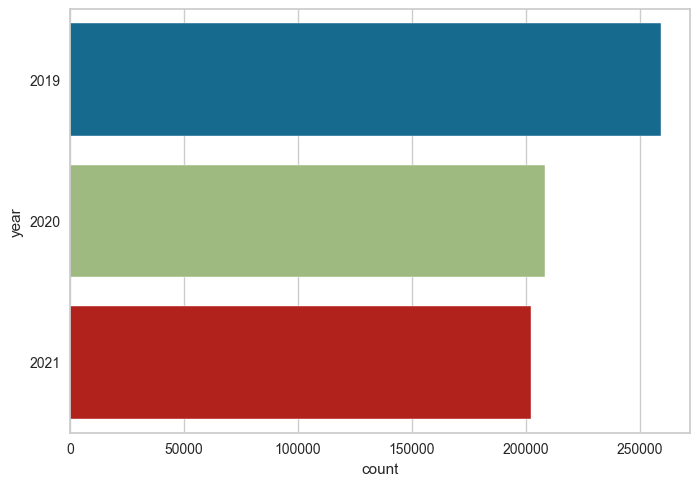

In [215]:
# Plot crimes according to the year

sns.countplot(y = 'year', data =crimes_df, order = pd.value_counts(crimes_df['year']).iloc[:3].index)

##### Observation: 2019 has highest crime rate

### Count of crimes according to block

<AxesSubplot: xlabel='count', ylabel='block'>

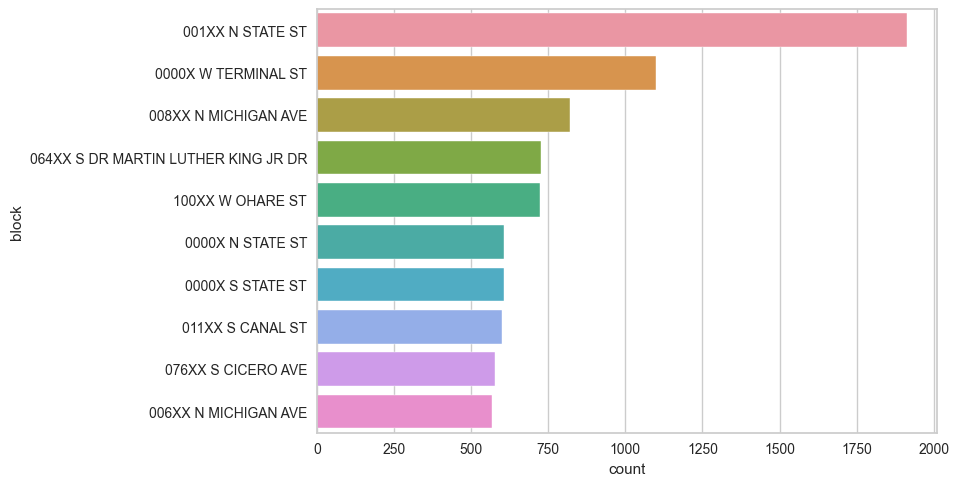

In [216]:
# Count of crimes according to block
sns.countplot(y = 'block', data = crimes_df, order = pd.value_counts(crimes_df['block']).iloc[:10].index)

##### Observation: 001XX N State St has highest crime rate

#### Hypothesis: 
Around 75 communities have registered cases relating to domestic violence.

In [217]:
domestic_data = crimes_df.loc[crimes_df['domestic'] == True] 

In [218]:
domestic_data.groupby('community_area').size()

community_area
1.0     1595
2.0     1470
3.0     1142
4.0      563
5.0      234
        ... 
73.0    1844
74.0     250
75.0    1104
76.0     329
77.0     759
Length: 77, dtype: int64

In [219]:
print('Total communities which have registered cases relating to domestic violence :', domestic_data.groupby('community_area').size().count())

Total communities which have registered cases relating to domestic violence : 77


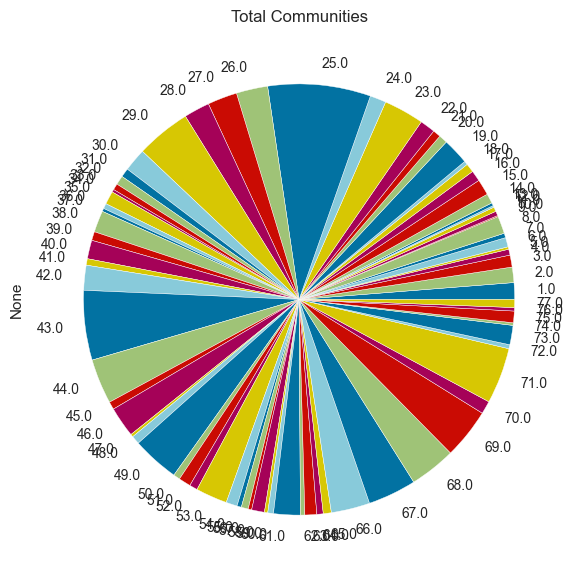

In [220]:
plt.figure(figsize=(15,7))
plt.title('Total Communities')
plt.ylabel('Domestic data')
domestic_data.groupby('community_area').size().plot(kind='pie')
plt.show()

### Visualisation of the crime count across the years

#### Trend graph

In [221]:
# convert dates to pandas datetime format
crimes_df.Date = pd.to_datetime(crimes_df.date, format='%m/%d/%Y %I:%M:%S %p')
# setting the index to be the date
crimes_df.index = pd.DatetimeIndex(crimes_df.Date)

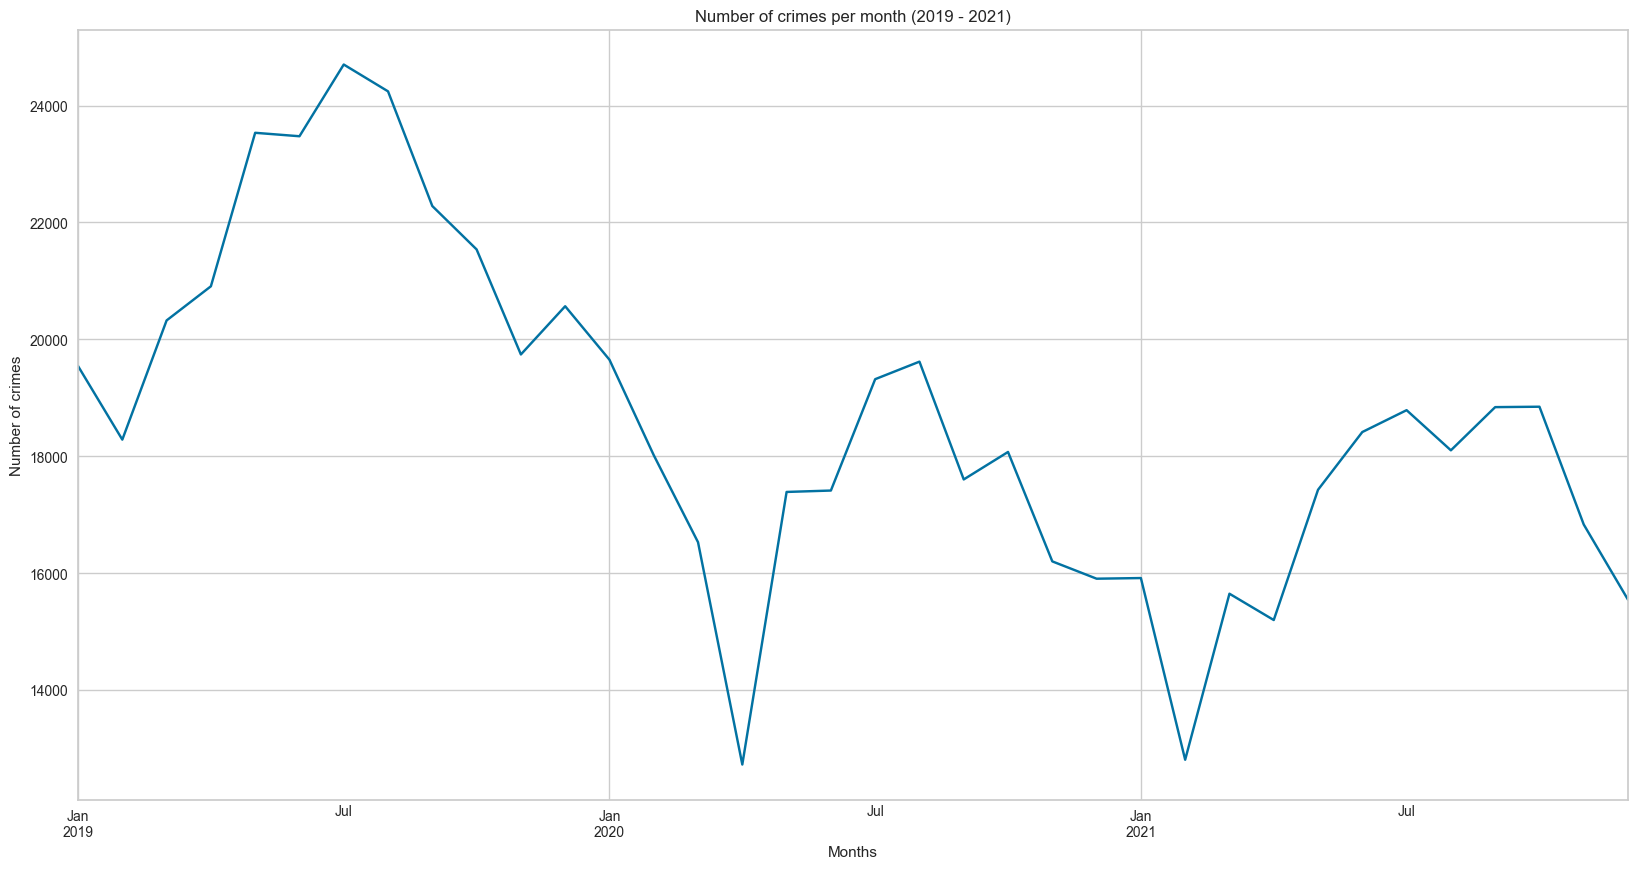

In [222]:
plt.figure(figsize=(20,10))
crimes_df.resample('M').size().plot(legend=False)
plt.title('Number of crimes per month (2019 - 2021)')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()

A trend graph is a graph that is used to show the trends data over a period of time. It describes a functional representation of two variables (x, y). In which the x is the time-dependent variable (time from 2019 to 2021) whereas y is the collected data (number of crimes)

- The above trend line shows us that the number of crimes dropped during March-June 2020 and again in Feb 2021. This can be directly correlated to the effect of the Covid-19 pandemic and the imposed lockdown restrictions
- Since, most people were home during this time, the number of crimes were comparitively lower

### Visualization of top 5 crimes in the year 2021

#### Trend line

In [223]:
# Finding the top 5 crimes 

top_5_crimes = crimes_df['primary_type'].value_counts().nlargest(5)
top_5_crimes

THEFT                 141095
BATTERY               131089
CRIMINAL DAMAGE        76064
ASSAULT                59008
DECEPTIVE PRACTICE     50799
Name: primary_type, dtype: int64

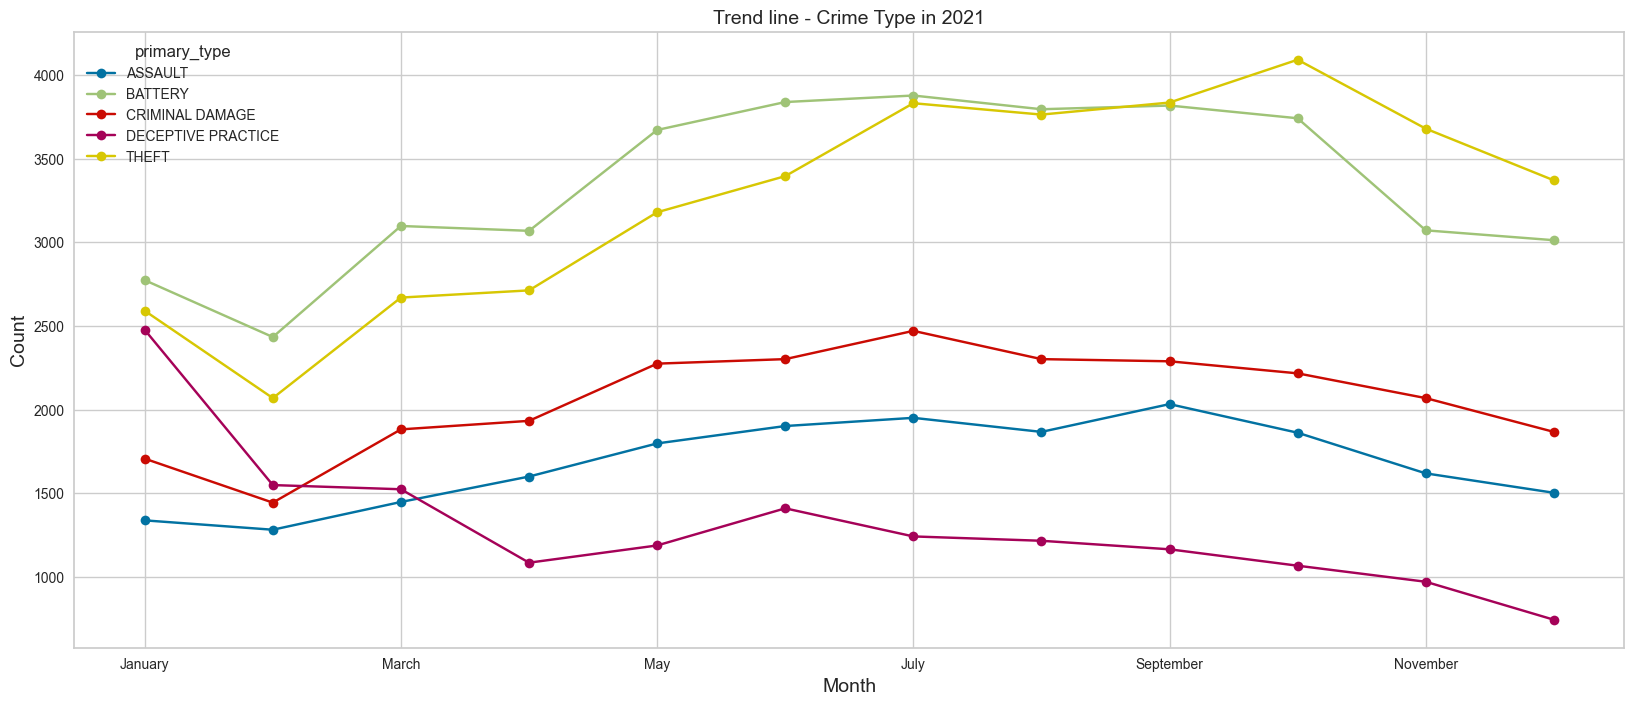

In [224]:
# Trend line - Monthly top 5 crimes in 2021

top_5_crimes_list = ["THEFT","BATTERY","CRIMINAL DAMAGE","ASSAULT","DECEPTIVE PRACTICE"]

crimes_data_2021 = crimes_df.loc[crimes_df['year'] == 2021]
crimes_data_2021_t5 = crimes_data_2021[crimes_data_2021["primary_type"].isin(top_5_crimes_list)]

crimes_data_2021_t5['month'] = pd.Categorical(crimes_data_2021_t5['month'], ['January','February','March','April','May','June','July','August','September','October','November','December'])

crimes_data_2021_t5.sort_values(['month'])


data_2022 = crimes_data_2021_t5.groupby(["month","primary_type"])['primary_type'].count().unstack()
data_2022.plot(marker='o',figsize=(20,8))

plt.title('Trend line - Crime Type in 2021', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

The above trend lines show the distribution of the top 5 crimes over the months in 2021
- Theft increases during the holiday season as seen in the upward slope from May to July and then remained consistent till October
- This is the similar trend for battery as well (Battery - a person may be charged with the crime of battery under Illinois law if he or she makes actual physical contact with another individual with the intent to injure, provoke, or insult that person)
- In general, crimes increase in summer - June to Aug and then taper off

# ML analysis (Model Building)

### Making prediction to find whether arrested or not.

We convert the numercial attributes to categorical attributes to improve the signal-to-noise ratio.

In [225]:
# Converting the numercial attributes to categorical attributes
crimes_df.year = pd.Categorical(crimes_df.year)
crimes_df.domestic = pd.Categorical(crimes_df.domestic)
crimes_df.arrest = pd.Categorical(crimes_df.arrest)
crimes_df.beat = pd.Categorical(crimes_df.beat)
crimes_df.district = pd.Categorical(crimes_df.district)
crimes_df.ward = pd.Categorical(crimes_df.ward)
crimes_df.community_area = pd.Categorical(crimes_df.community_area)

In [226]:
# Dropping the attributes date,block,iucr,primary_type,description,location_description,fbi_code,updated_on,x_coordinate,y_coordinate.
crimes_dff = crimes_df.drop(['date','block','iucr','primary_type','description','location_description','fbi_code','updated_on','x_coordinate','y_coordinate'],axis = 1)

As date,block,iucr,primary_type,description,location_description,fbi_code,updated_on,x_coordinate,y_coordinate do not make impact on arrest_True. 

Removing dummy values

In [227]:
crimes_dff = pd.get_dummies(crimes_dff,drop_first=True)


In [228]:
crimes_dff.head()

,id,latitude,longitude,arrest_True,domestic_True,beat_112,beat_113,beat_114,beat_121,beat_122,...,month_July,month_June,month_March,month_May,month_November,month_October,month_September,season_Spring,season_Summer,season_Winter
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,11552667,41.889453,-87.627995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2019-01-01,11552674,41.726566,-87.636066,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2019-01-01,11552709,41.812780,-87.691894,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2019-01-01,11552758,41.778565,-87.665464,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2019-01-01,11553168,41.898768,-87.624116,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


##### In the attribute arrest_True the value 1 represents that arrest has happened. The value 0 represents the criminal did not get arrested.

In [374]:
# Train test spliting the data with test size 30%
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(crimes_dff.drop(['arrest_True'],axis=1),crimes_dff['arrest_True'], test_size=0.3,random_state=0)

We Standardize the data as data have varying scales and the algorithm you are using does make assumptions about your data having a Gaussian distribution.

In [375]:
# Standardizing the data
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train) 
x_test = scaler.transform(x_test)

### Using Gaussain Naive Bayes

In [376]:
# Using Gaussain to predict if arrest happens or not
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

Confusion_matrix on the prediction we made.

In [232]:
# Displaying confusion matrix
from sklearn import metrics
from sklearn.metrics import classification_report
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[73472 93169]
 [ 9405 24947]]


Using seaborn and matplotlib to visualize the confusion matrix for better understanding.

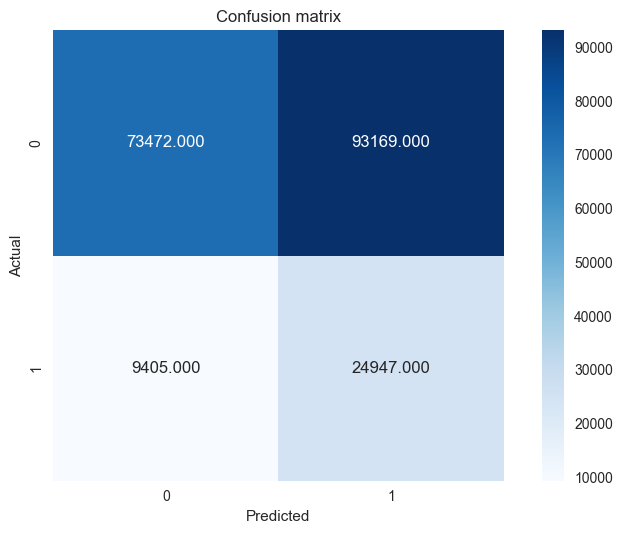

In [233]:
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

Classification report and accuracy.

In [234]:
print('Accuracy = ',metrics.accuracy_score(y_test, y_pred))
print('Error = ',1 - metrics.accuracy_score(y_test, y_pred))
print('Precision = ',metrics.precision_score(y_test, y_pred,))
print('Recall = ',metrics.recall_score(y_test, y_pred))
print('F-1 Score = ',metrics.f1_score(y_test, y_pred))
print('Classification Report\n',metrics.classification_report(y_test, y_pred))

Accuracy =  0.4896638191379799
Error =  0.5103361808620202
Precision =  0.21120762640116494
Recall =  0.7262168141592921
F-1 Score =  0.32724243775743106
Classification Report
               precision    recall  f1-score   support

           0       0.89      0.44      0.59    166641
           1       0.21      0.73      0.33     34352

    accuracy                           0.49    200993
   macro avg       0.55      0.58      0.46    200993
weighted avg       0.77      0.49      0.54    200993



## KNN classifier

#### Making a prediction whether an arrest will happen or no

In [235]:
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [256]:
crimes_knn = pd.read_csv('Crimes-2019_to_2021.csv')
crimes_knn.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11552667,JC100123,1/1/19 0:00,004XX N STATE ST,890,THEFT,FROM BUILDING,RESTAURANT,False,False,...,42.0,8.0,6,1176302.0,1903096.0,2019,1/10/19 15:16,41.889453,-87.627995,"(41.889453169, -87.627994833)"
1,11552674,JC100085,1/1/19 0:00,092XX S NORMAL AVE,910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,21.0,73.0,7,1174586.0,1843723.0,2019,1/10/19 15:16,41.726566,-87.636066,"(41.726566477, -87.636065622)"
2,11552709,JC100020,1/1/19 0:00,044XX S WASHTENAW AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,15.0,58.0,08B,1159112.0,1875020.0,2019,1/10/19 15:16,41.812780,-87.691894,"(41.812780011, -87.691893746)"
3,11552758,JC100058,1/1/19 0:00,063XX S MARSHFIELD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,...,16.0,67.0,14,1166414.0,1862607.0,2019,1/10/19 15:16,41.778565,-87.665464,"(41.77856457, -87.665463557)"
4,11553168,JC100745,1/1/19 0:00,008XX N MICHIGAN AVE,890,THEFT,FROM BUILDING,RESTAURANT,False,False,...,2.0,8.0,6,1177330.0,1906499.0,2019,1/10/19 15:16,41.898768,-87.624116,"(41.898767916, -87.624116333)"


In [258]:
crimes_knn.dropna(subset = ['Latitude','Longitude','Ward'], inplace = True)
crimes_knn.reset_index(drop = True, inplace = True)
crimes_knn['Location Description'] = crimes_knn['Location Description'].fillna('Unavailable')

In [259]:
crimes_knn = crimes_knn.drop(['Case Number','Block','Description','FBI Code','Date','Updated On','Location'],axis=1)


In [260]:
#Converting object to category

crimes_knn['IUCR'] = crimes_knn['IUCR'].astype('category')
crimes_knn['Primary Type'] = crimes_knn['Primary Type'].astype('category')
crimes_knn['Location Description'] = crimes_knn['Location Description'].astype('category')

In [261]:
crimes_knn['IUCR'] = crimes_knn['IUCR'].cat.codes
crimes_knn['Primary Type'] = crimes_knn['Primary Type'].cat.codes
crimes_knn['Location Description'] = crimes_knn['Location Description'].cat.codes

In [262]:
# TRAIN-TEST SPLIT

X_train, X_test, Y_train, Y_test = train_test_split(crimes_knn.drop(['Arrest'],axis=1),crimes_knn[['Arrest']], test_size=0.3)

In [263]:
X_train= np.asarray(X_train)
Y_train= np.asarray(Y_train)

X_test= np.asarray(X_test)
Y_test= np.asarray(Y_test)

In [264]:
print('Number of training samples: ', X_train.shape[0])
print('Number of testing samples: ', X_test.shape[0])

Number of training samples:  468982
Number of testing samples:  200993


In [265]:
# Normalization - To scale input vectors individually to unit norm (vector length)

normalized_X_train = Normalizer().fit_transform(X_train) 
normalized_X_test = Normalizer().fit_transform(X_test) 

#### Taking k value to be 3

In [266]:
knn3 = KNeighborsClassifier(3)
knn3.fit(normalized_X_train, Y_train.ravel())
y_pred_sklearn = knn3.predict(normalized_X_test)
print(accuracy_score(Y_test,y_pred_sklearn))

0.7851069440229261


### Finding the most optimal value of k to give us the best accuracy

In [267]:
accuracy_rate = []
for i in range(1,50,2):
    knn= KNeighborsClassifier(i)
    knn.fit(normalized_X_train,Y_train)
    Y_pred=knn.predict(normalized_X_test)
    accuracy_rate.append(accuracy_score(Y_test,Y_pred))

Text(0, 0.5, 'Accuracy Rate')

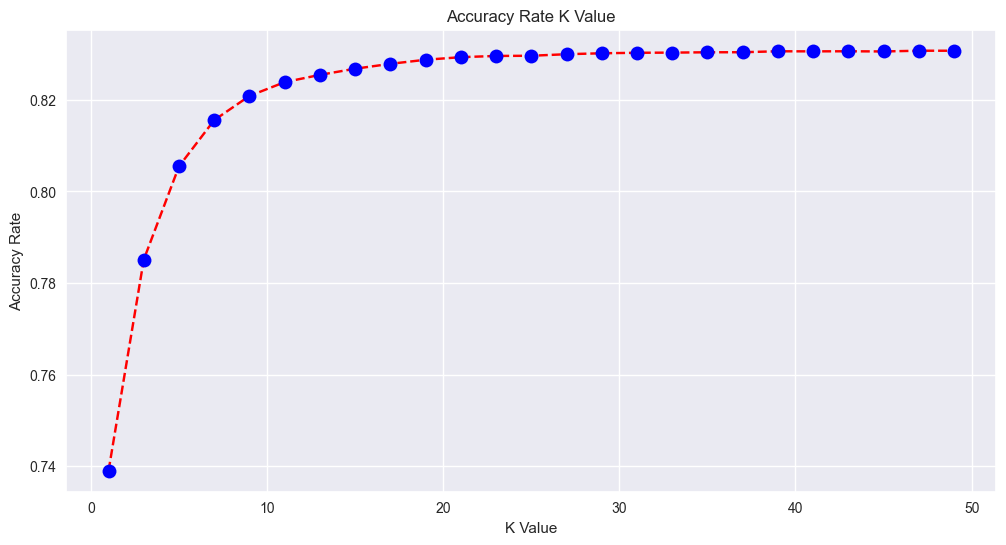

In [268]:
plt.figure(figsize=(12, 6))
plt.plot(range(1,50,2), accuracy_rate, color='red', linestyle='dashed', marker='o',
        markerfacecolor='blue', markersize=10)
plt.title('Accuracy Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy Rate')

##### Here, we see that choosing k value to be 11 gives us a higher accuracy without overfitting the model. We now found our optimal value for k!

### Retraining the model with k = 11

In [269]:
knn11 = KNeighborsClassifier(11)
knn11.fit(normalized_X_train, Y_train.ravel())
y_pred_sklearn = knn11.predict(normalized_X_test)
print(accuracy_score(Y_test,y_pred_sklearn))

0.8238346609085888


#### Therefore, we see that we get an accuracy of 82% to predict whether an arrest will happen or no using K-Nearest Neighbors technique (K=11)

In [275]:
from sklearn.metrics import confusion_matrix,classification_report,f1_score


In [277]:
conf_matrix_knn = confusion_matrix(Y_test,y_pred_sklearn)
conf_matrix_knn

array([[163445,   3496],
       [ 31912,   2140]])

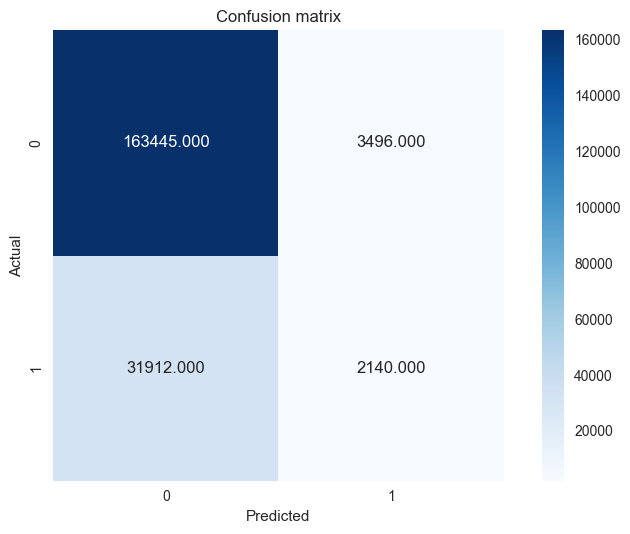

In [278]:
sns.set_style("darkgrid")
sns.heatmap(conf_matrix_knn, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

To look more into this model, I created a confusion matrix showing the model’s prediction of arrest rate. You can see the largest value is a was a true positive: a true arrest prediction (163445). There are a significant amount of false negatives (43094) but very few false positives (3496). I argue that false positives are worse than false negatives in this business case: if a crime company or the Chicago PD was to predict someone would get arrested, but they did not, it could persuade them to arrest someone that perhaps does not deserve it

In [276]:
print('F1 score ', f1_score(Y_test, y_pred_sklearn, average = 'weighted'))

F1 score  0.7676773779762945


In [272]:
print(classification_report(Y_test,y_pred_sklearn))


              precision    recall  f1-score   support

       False       0.84      0.98      0.90    166941
        True       0.38      0.06      0.11     34052

    accuracy                           0.82    200993
   macro avg       0.61      0.52      0.51    200993
weighted avg       0.76      0.82      0.77    200993



## Random forest with Hyperparameter tuning using RandomizedSearchCV

#### Making a prediction whether an arrest will happen or no

In [379]:
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, roc_curve, classification_report
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler

In [380]:
crimes_df_clustering = pd.read_csv('Crimes-2019_to_2021.csv')

In [381]:
crimes_df_clustering = crimes_df_clustering.drop(['Case Number','Block','Description','FBI Code','Date','Updated On','Location'],axis=1)

In [382]:
crimes_df_clustering.dropna(subset = ['Latitude','Longitude','Ward'], inplace = True)
crimes_df_clustering.reset_index(drop = True, inplace = True)
crimes_df_clustering['Location Description'] = crimes_df_clustering['Location Description'].fillna('Unavailable')

In [383]:
crimes_df_clustering

,ID,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
0,11552667,890,THEFT,RESTAURANT,False,False,1831,18,42.0,8.0,1176302.0,1903096.0,2019,41.889453,-87.627995
1,11552674,910,MOTOR VEHICLE THEFT,STREET,False,False,2223,22,21.0,73.0,1174586.0,1843723.0,2019,41.726566,-87.636066
2,11552709,486,BATTERY,APARTMENT,False,True,922,9,15.0,58.0,1159112.0,1875020.0,2019,41.812780,-87.691894
3,11552758,1310,CRIMINAL DAMAGE,APARTMENT,False,False,725,7,16.0,67.0,1166414.0,1862607.0,2019,41.778565,-87.665464
4,11553168,890,THEFT,RESTAURANT,False,False,1833,18,2.0,8.0,1177330.0,1906499.0,2019,41.898768,-87.624116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669970,12582884,1152,DECEPTIVE PRACTICE,APARTMENT,False,False,532,5,9.0,53.0,1178352.0,1827293.0,2021,41.681396,-87.622767
669971,12581143,1130,DECEPTIVE PRACTICE,VEHICLE NON-COMMERCIAL,False,False,113,1,42.0,32.0,1176417.0,1899159.0,2021,41.878647,-87.627691
669972,12582638,610,BURGLARY,APARTMENT,False,False,621,6,17.0,69.0,1173874.0,1854232.0,2021,41.755420,-87.638363
669973,12582397,810,THEFT,APARTMENT,False,False,1414,14,1.0,22.0,1156470.0,1913530.0,2021,41.918509,-87.700544


In [384]:
# Converting object to category

crimes_df_clustering['IUCR'] = crimes_df_clustering['IUCR'].astype('category')
crimes_df_clustering['Primary Type'] = crimes_df_clustering['Primary Type'].astype('category')
crimes_df_clustering['Location Description'] = crimes_df_clustering['Location Description'].astype('category')

In [385]:
crimes_df_clustering['IUCR'] = crimes_df_clustering['IUCR'].cat.codes
crimes_df_clustering['Primary Type'] = crimes_df_clustering['Primary Type'].cat.codes
crimes_df_clustering['Location Description'] = crimes_df_clustering['Location Description'].cat.codes

In [386]:
# TRAIN-TEST SPLIT

X_train, X_test, Y_train, Y_test = train_test_split(crimes_df_clustering.drop(['Arrest'],axis=1),crimes_df_clustering[['Arrest']], test_size=0.3, random_state = 0)

Our target column is Arrest. We are dropping the column Arrest while feeding in the X value and only giving in the Arrest column while feeding the Y value (target)

In [387]:
# STANDARDISING

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Standardising is done to improve the quality of data by removing the mean and scaling to unit variance

In [388]:
model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators':list(range(100, 300, 10)),
            'min_samples_leaf':list(range(1, 50)),
            'max_depth':list(range(2, 20)),
            'max_features':['log2', 'sqrt'],
            'bootstrap':[True, False],
            'criterion' : ["gini","entropy"],
        }
    }
}

These are the different hyperparameters we want our model to check before arriving at an optimal set of parameters to give us the best model

In [389]:
def my_custom_loss_func(y_true, y_pred):
    p_score = precision_score(y_true, y_pred)
    return p_score

In [390]:
# K-FOLD SPLIT

kfold_splits = 3
kf = StratifiedKFold(n_splits=kfold_splits)
custom_score = make_scorer(my_custom_loss_func, greater_is_better=True)
model_list = []

There are 2 ways we can do hyperparameter tuning:
- GridSearchCV
- RandomisedSearchCV  

When we take a ML model there are different hyperparameters we need to work on and there can be different possibilities that a hyperparameter can take. 

1. GridSearchCV - When we use GridSearchCV technique, we will try to use all those values so in each time we will try to check that particular hyperparameter value and see which value is giving us the highest accuracy. Since GridSearchCV uses each and every combination to build and evaluate the model performance, this method is highly computational expensive

2. RandomisedSearchCV - In this, instead of calculating the performance of the model for different combinations of hyperparameters, we will randomly select only few parameters and then we will try to find which is the best value

We chose *RandomisedSearchCV* because we have many combinations of parameters. Running GridSearchCV would be very computationally intensive. 

In [391]:
for model_name, mp in model_params.items():
    print("1")
    clf_recall = RandomizedSearchCV(mp['model'], mp['params'], n_jobs=11, cv=kf, scoring=custom_score, verbose=10, return_train_score=False)
    print("2")
    clf_recall.fit(X_train, Y_train.values.ravel())
    print("3")
    Y_predict = clf_recall.predict(X_test_std)
    print("4")
    confusion_matrix_RF = confusion_matrix(Y_test, Y_predict)

1
2
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 2/3; 2/10] START bootstrap=False, criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=8, n_estimators=250
[CV 1/3; 3/10] START bootstrap=True, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=11, n_estimators=100
[CV 1/3; 2/10] START bootstrap=False, criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=8, n_estimators=250
[CV 2/3; 3/10] START bootstrap=True, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=11, n_estimators=100
[CV 3/3; 2/10] START bootstrap=False, criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=8, n_estimators=250
[CV 2/3; 4/10] START bootstrap=True, criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=28, n_estimators=180
[CV 3/3; 1/10] START bootstrap=False, criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=49, n_estimators=130[CV 3/3; 3/10] START bootstrap=True, criterion=gini, max_dept

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/3; 5/10] START bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=14, n_estimators=120
[CV 1/3; 1/10] END bootstrap=False, criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=49, n_estimators=130;, score=0.943 total time= 3.3min
[CV 3/3; 5/10] START bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=14, n_estimators=120
[CV 2/3; 1/10] END bootstrap=False, criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=49, n_estimators=130;, score=0.951 total time= 3.3min
[CV 3/3; 1/10] END bootstrap=False, criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=49, n_estimators=130;, score=0.944 total time= 3.4min
[CV 1/3; 6/10] START bootstrap=False, criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=34, n_estimators=150
[CV 2/3; 6/10] START bootstrap=False, criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=34, n_estimators=150
[CV 1/3; 5/10] END bootst

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/3; 9/10] END bootstrap=False, criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=25, n_estimators=230;, score=0.000 total time= 1.8min
[CV 1/3; 10/10] START bootstrap=False, criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=24, n_estimators=270
[CV 1/3; 6/10] END bootstrap=False, criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=34, n_estimators=150;, score=0.927 total time= 7.6min
[CV 2/3; 10/10] START bootstrap=False, criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=24, n_estimators=270
[CV 2/3; 6/10] END bootstrap=False, criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=34, n_estimators=150;, score=0.923 total time= 7.6min
[CV 3/3; 10/10] START bootstrap=False, criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=24, n_estimators=270
[CV 3/3; 6/10] END bootstrap=False, criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=34, n_estimators=150;, score=0.929 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/3; 9/10] END bootstrap=False, criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=25, n_estimators=230;, score=0.000 total time= 2.5min
[CV 1/3; 2/10] END bootstrap=False, criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=8, n_estimators=250;, score=0.924 total time=14.5min
[CV 2/3; 2/10] END bootstrap=False, criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=8, n_estimators=250;, score=0.919 total time=14.5min
[CV 3/3; 2/10] END bootstrap=False, criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=8, n_estimators=250;, score=0.924 total time=14.5min
[CV 1/3; 8/10] END bootstrap=False, criterion=entropy, max_depth=18, max_features=sqrt, min_samples_leaf=15, n_estimators=170;, score=0.923 total time= 9.3min
[CV 2/3; 8/10] END bootstrap=False, criterion=entropy, max_depth=18, max_features=sqrt, min_samples_leaf=15, n_estimators=170;, score=0.919 total time= 9.2min
[CV 3/3; 8/10] END bootstrap=False, criterion=entr

Using best_params_ we get the best set of hyperparameters that will give us the most optimal result

In [392]:
print(clf_recall.best_params_)

{'n_estimators': 130, 'min_samples_leaf': 19, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini', 'bootstrap': True}


Using best_score_ we get the accuracy of our model using the best chosen combination of hyperparameters

In [393]:
print(clf_recall.best_score_)

0.9470430755884601


In [394]:
model = RandomForestClassifier(n_estimators=130, min_samples_leaf=19, max_features='sqrt', max_depth=10, criterion='gini', bootstrap=True)

In [417]:
model.fit(X_train,Y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=19, n_estimators=130)

In [396]:
y_pred = model.predict(X_test)

In [398]:
print('Accuracy = ',metrics.accuracy_score(Y_test, y_pred))

Accuracy =  0.8957376625056594


##### The accuracy has significantly increased using Random Forest algorithm with hyperparameter tuning. We achieved the highest accuracy of 89.57% i.e., our predictions are 89+% correct to give us the right prediction whether an arrest will happen or no

In [397]:
conf_matrix = metrics.confusion_matrix(Y_test, y_pred)
print(conf_matrix)

[[165731    910]
 [ 20046  14306]]


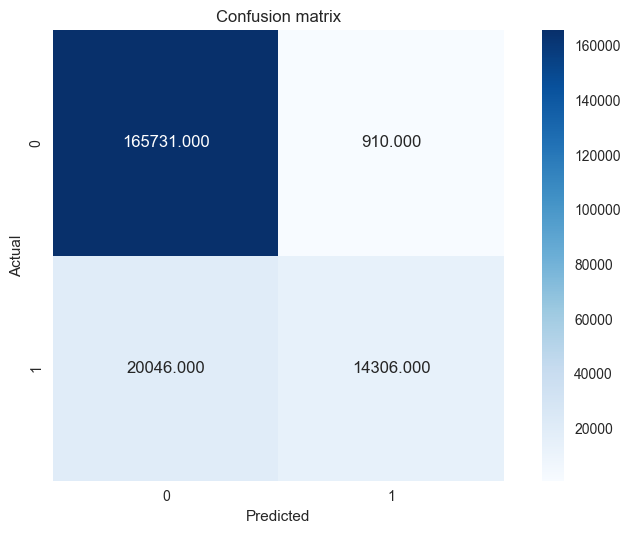

In [412]:
sns.set_style("darkgrid")
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [409]:
TN = conf_matrix[0][0]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]
FP = conf_matrix[0][1]

FPR = (FP/(FP+TN)) * 100

In [411]:
print('The false positive rate is: ',FPR,'%')

The false positive rate is:  0.5460840969509304 %


Confusion matrix showing the model’s prediction of arrest rate. You can see the largest value is a was a true positive: a true arrest prediction (165731). There are also a good number of true negatives which would rightly predict when the arrest won't happen
- There are very few false positives (910) and the False Positive Rate (FPR) is 0.54% which is very low. So, in the case when an actual arrest does no happen, our model does not predict that it has happened (which could be very dangerous)
- There are still a lot of False negatives but this isn't as much as an issue because we are not falsely predicting that people are arrested

In [414]:
# View the classification report for test data and predictions

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

       False       0.89      0.99      0.94    166641
        True       0.94      0.42      0.58     34352

    accuracy                           0.90    200993
   macro avg       0.92      0.71      0.76    200993
weighted avg       0.90      0.90      0.88    200993



In [415]:
from yellowbrick.classifier import ClassificationReport

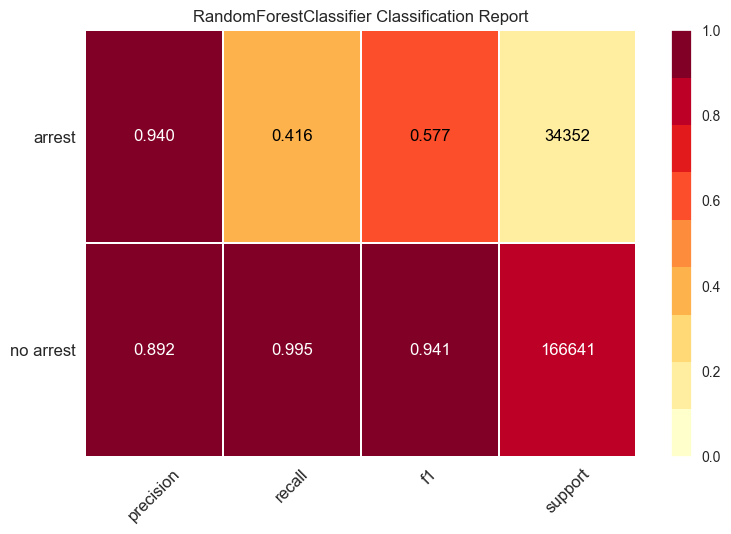

<AxesSubplot: title={'center': 'RandomForestClassifier Classification Report'}>

In [416]:
classes=['no arrest','arrest']

visualizer = ClassificationReport(model, classes=classes, support=True)

visualizer.fit(X_train, Y_train)        # Fit the visualizer and the model
visualizer.score(X_test, Y_test)        # Evaluate the model on the test data
visualizer.show() 

### What is hardest part of the project that you’ve encountered so far?

We initially started working on entire Chicago data set since 2001, but it was consuming high computatation and patterns are not relevant to current crimes. So, we sampled a portion of data from 2019 to 2021 to obtain better results.

### What are your initial insights?

The data was well structured but had some missing values and inconsistancies. As a result, we had to to perform various cleaning methods and preprocessing techniques to clean the data. 
To perform EDA and visualization , we had to perform some techniques like grouping of columns, indexing of records, counting of values, to get quick understanding of the patterns in data.
To build an effective model, we have to convert the numerical data to categorical data to execute the Gaussian model. 

### Are there any concrete results you can show at this point? If not, why not?

Yes. Currently, we have performed data cleaning, data visualization , EDA and model execution on the crimes data set. Using Gaussian Naive Bayes Model,we obtained an accuracy of 49% on the data and predicted the possibility of arrest to happen. Our next step is to obtain better accuracy using a different model, and predict the type of crime that has occured.

### Going forward, what are the current biggest problems you’re facing?

Accuracy can be improved for the data prediction, by applying a different model.

### Do you think you are on track with your project? If not, what parts do you need to dedicate more time to?

Yes. We would be trying out different models in the coming days to decide on a suitable model which gives the highest accuracy.

### Given your initial exploration of the data, is it worth proceeding with your project, why? If not, how are you going to change your project and why doyou think it’s better than your current results?

Yes. From the insights that we gained, we have obtained results which have a good scope to be improved further.

### Next steps: What you plan to accomplish in the next month and how you plan to evaluate whether your project achieved the goals you set for it.

We will compare the accuracies between various models such as Random Forest classifier, Logistic Regression and see which model best fits the data to get right output.